In [11]:
import pandas as pd
import numpy as np
import os
import matplotlib.pyplot as plt
%matplotlib inline
import seaborn as sns
sns.set(style="darkgrid")

In [12]:
data = pd.read_csv('./input/train.csv', parse_dates=['Dates'])
print(data.shape)
data.head()

(878049, 9)


,Dates,Category,Descript,DayOfWeek,PdDistrict,Resolution,Address,X,Y
0,2015-05-13 23:53:00,WARRANTS,WARRANT ARREST,Wednesday,NORTHERN,"ARREST, BOOKED",OAK ST / LAGUNA ST,-122.425892,37.774599
1,2015-05-13 23:53:00,OTHER OFFENSES,TRAFFIC VIOLATION ARREST,Wednesday,NORTHERN,"ARREST, BOOKED",OAK ST / LAGUNA ST,-122.425892,37.774599
2,2015-05-13 23:33:00,OTHER OFFENSES,TRAFFIC VIOLATION ARREST,Wednesday,NORTHERN,"ARREST, BOOKED",VANNESS AV / GREENWICH ST,-122.424363,37.800414
3,2015-05-13 23:30:00,LARCENY/THEFT,GRAND THEFT FROM LOCKED AUTO,Wednesday,NORTHERN,NONE,1500 Block of LOMBARD ST,-122.426995,37.800873
4,2015-05-13 23:30:00,LARCENY/THEFT,GRAND THEFT FROM LOCKED AUTO,Wednesday,PARK,NONE,100 Block of BRODERICK ST,-122.438738,37.771541


In [13]:
test = pd.read_csv('./input/test.csv', parse_dates=['Dates'])
print(test.shape)
test.head()

(884262, 7)


,Id,Dates,DayOfWeek,PdDistrict,Address,X,Y
0,0,2015-05-10 23:59:00,Sunday,BAYVIEW,2000 Block of THOMAS AV,-122.399588,37.735051
1,1,2015-05-10 23:51:00,Sunday,BAYVIEW,3RD ST / REVERE AV,-122.391523,37.732432
2,2,2015-05-10 23:50:00,Sunday,NORTHERN,2000 Block of GOUGH ST,-122.426002,37.792212
3,3,2015-05-10 23:45:00,Sunday,INGLESIDE,4700 Block of MISSION ST,-122.437394,37.721412
4,4,2015-05-10 23:45:00,Sunday,INGLESIDE,4700 Block of MISSION ST,-122.437394,37.721412


In [14]:
## Exploration all fileds. Especially, What fields include "NaN value"
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 878049 entries, 0 to 878048
Data columns (total 9 columns):
Dates         878049 non-null datetime64[ns]
Category      878049 non-null object
Descript      878049 non-null object
DayOfWeek     878049 non-null object
PdDistrict    878049 non-null object
Resolution    878049 non-null object
Address       878049 non-null object
X             878049 non-null float64
Y             878049 non-null float64
dtypes: datetime64[ns](1), float64(2), object(6)
memory usage: 60.3+ MB


In [15]:
data['Dates-year'] = data['Dates'].dt.year
data['Dates-month'] = data['Dates'].dt.month
data['Dates-day'] = data['Dates'].dt.day
data['Dates-hour'] = data['Dates'].dt.hour

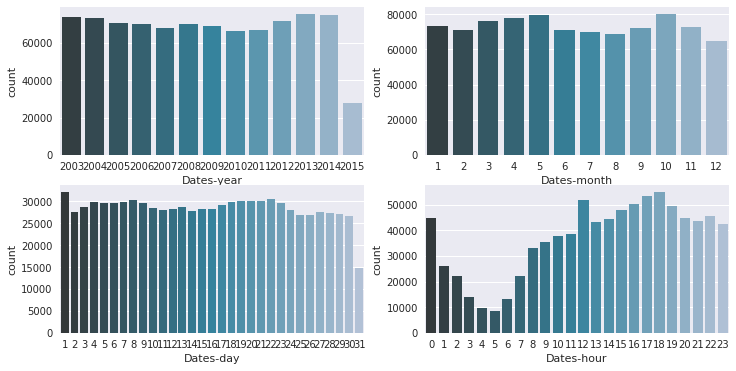

In [20]:
fig, ((axis1,axis2),(axis3,axis4)) = plt.subplots(nrows=2, ncols=2)
fig.set_size_inches(12,6)

sns.countplot(data=data, x='Dates-year', palette="PuBuGn_d", ax=axis1)
sns.countplot(data=data, x='Dates-month', palette="PuBuGn_d", ax=axis2)
sns.countplot(data=data, x='Dates-day', palette="PuBuGn_d", ax=axis3)
sns.countplot(data=data, x='Dates-hour', palette="PuBuGn_d", ax=axis4)

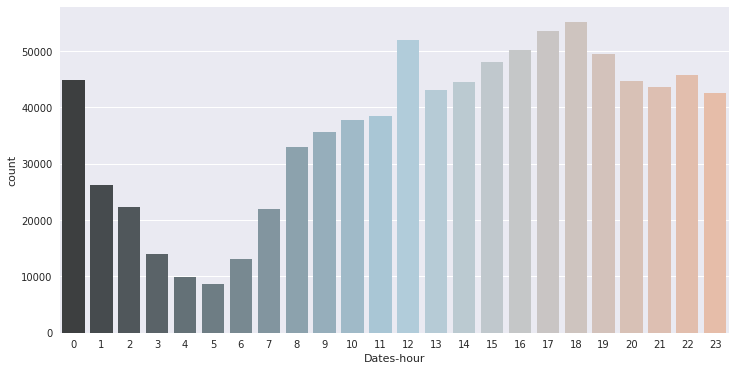

In [23]:
fig, axis1 = plt.subplots(nrows=1, ncols=1, figsize=(12,6)) 
sns.countplot(data=data, x='Dates-hour', palette="RdBu_d", ax=axis1)

In [26]:
# Number of addresses containing '/'
street_length = len(data[data['Address'].str.contains('/')])
print(street_length)

# Number of Block Addresses
print(len(data['Address'])- street_length)

260818
617231


In [27]:
def bin_address(address):
    if '/' in address:
        return 'Street'
    else:
        return 'Block'

In [28]:
data['Address_type'] = data['Address'].apply(bin_address)
data[['Address', 'Address_type']].head()

,Address,Address_type
0,OAK ST / LAGUNA ST,Street
1,OAK ST / LAGUNA ST,Street
2,VANNESS AV / GREENWICH ST,Street
3,1500 Block of LOMBARD ST,Block
4,100 Block of BRODERICK ST,Block
